<center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300"></center><br/>

# Assignment: Notebook for Peer Assignment

Estimated time needed: 60 minutes


# Assignment Scenario

Congratulations! You have just been hired by a US Weather forecast firm as a data scientist.

The company is considering the weather condition to help predict the possibility of precipitations, which involves using various local climatological variables, including temperature, wind speed, humidity, dew point, and pressure. The data you will be handling was collected by a NOAA weather station located at the John F. Kennedy International Airport in Queens, New York.

Your task is to provide a high level analysis of weather data in JFK Airport. Your stakeholders want to understand the current and historical record of precipitations based on different variables. For now they are mainly interested in a macro-view of JFK Airport Weather, and how it relates to the possibility to rain because it will affect flight delays and etc.


# Introduction

This project relates to the NOAA Weather Dataset - JFK Airport (New York). The original dataset contains 114,546 hourly observations of 12 local climatological variables (such as temperature and wind speed) collected at JFK airport. This dataset can be obtained for free from the IBM Developer [Data Asset Exchange](https://developer.ibm.com/exchanges/data/all/jfk-weather-data/). 

For this project, you will be using a subset dataset, which contains 5727 rows (about 5% or original rows) and 9 columns. The end goal will be to predict the precipitation using some of the available features. In this project, you will practice reading data files, preprocessing data, creating models, improving models and evaluating them to ultimately choose the best model.




## Table of Contents:

Using this R notebook you will complete **10 tasks**:
* [0. Import Modules](#cell0)
* [1. Download and Unzip NOAA Weather Dataset](#cell1)
* [2. Read Dataset into Project](#cell2)
* [3. Select Subset of Columns](#cell3)
* [4. Clean Up Columns](#cell4)
* [5. Convert Columns to Numerical Types](#cell5)
* [6. Rename Columns](#cell6)
* [7. Exploratory Data Analysis](#cell7)
* [8. Linear Regression](#cell8)
* [9. Improve the Model](#cell9)
* [10. Find Best Model](#cell10)


<a id="cell0"></a>
## 0. Import required modules

Tidymodels is a collection of packages that use tidyverse principles to easily do the entire modeling process from preprocessing initial data, to creating a model, to tunning hyperparameters. The tidymodels packages can be used to produce high quality statistical and machine learning models. Our Jupyter notebook platforms have a built-in Tidyverse, Tidymodels and rlang packages so we do not need to install these packages prior to loading library. However, if you decide to run this lab on your RStudio Desktop locally on your machine, you can remove the commented lines of code to install these packages before loading.
 


In [ ]:
# Install tidymodels if you haven't done so
# install.packages("rlang")
# install.packages("tidymodels")

**Note: After installing the packages, restart the kernel. Without installing the packages again, load them. Tidyverse and Tidymodels will be the two main packages you will use.**


In [45]:
# Library for modeling
library(tidymodels)

# Load tidyverse
library(tidyverse)


### Understand the Dataset

The original NOAA JFK dataset contains 114,546 hourly observations of various local climatological variables (including temperature, wind speed, humidity, dew point, and pressure). 

In this project you will use a sample dataset, which is around 293 KB. [Link to the sample dataset](https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz).

The sample contains 5727 rows (about 5% or original rows) and 9 columns, which are:
- DATE
- HOURLYDewPointTempF
- HOURLYRelativeHumidity
- HOURLYDRYBULBTEMPF
- HOURLYWETBULBTEMPF
- HOURLYPrecip
- HOURLYWindSpeed
- HOURLYSeaLevelPressure
- HOURLYStationPressure

The original dataset is much bigger. Feel free to explore the original dataset. [Link to the original dataset.](https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa_weather.html) 

For more information about the dataset, checkout the [preview](https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/data-preview/index.html?_ga=2.176781478.281508226.1616293518-1509963377.1616117067&cm_mc_uid=90945889198916153255549&cm_mc_sid_50200000=64650651616293516933) of NOAA Weather - JFK Airport.


<a id="cell1"></a>

## 1. Download NOAA Weather Dataset

Use the `download.file()` function to download the sample dataset from the URL below.

URL = 'https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz'


In [46]:
url <- "https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz"
download.file(url, destfile = "noaa-weather-sample-data.tar.gz")

Untar the zipped file.


In [47]:
untar("noaa-weather-sample-data.tar.gz", tar = "internal")

Warning message in untar2(tarfile, files, list, exdir, restore_times):
“using pax extended headers”

<a id="cell2"></a>
## 2. Extract and Read into Project
We start by reading in the raw dataset. You should specify the file name as "noaa-weather-sample-data/jfk_weather_sample.csv".


In [48]:
noaa_weather_data <- read_csv("noaa-weather-sample-data/jfk_weather_sample.csv")

Parsed with column specification:
cols(
  DATE = col_datetime(format = ""),
  HOURLYDewPointTempF = col_double(),
  HOURLYRelativeHumidity = col_double(),
  HOURLYDRYBULBTEMPF = col_double(),
  HOURLYWETBULBTEMPF = col_double(),
  HOURLYPrecip = col_character(),
  HOURLYWindSpeed = col_double(),
  HOURLYSeaLevelPressure = col_double(),
  HOURLYStationPressure = col_double()
)
Warning message:
“1 parsing failure.
 row                 col               expected actual                                              file
1443 HOURLYDewPointTempF no trailing characters      s 'noaa-weather-sample-data/jfk_weather_sample.csv'
”

Next, display the first few rows of the dataframe.


In [49]:
head(noaa_weather_data)

DATE,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYPrecip,HOURLYWindSpeed,HOURLYSeaLevelPressure,HOURLYStationPressure
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2015-07-25 13:51:00,60,46,83,68,0.00,13,30.01,29.99
2016-11-18 23:51:00,34,48,53,44,0.00,6,30.05,30.03
2013-01-06 08:51:00,33,89,36,35,0.00,13,30.14,30.12
2011-01-27 16:51:00,18,48,36,30,0.00,14,29.82,29.80
2015-01-03 12:16:00,27,61,39,34,T,11,NA,30.50
2013-02-15 20:51:00,35,79,41,38,0.00,6,29.94,29.92


Also, take a `glimpse` of the dataset to see the different column data types and make sure it is the correct subset dataset with about 5700 rows and 9 columns.


In [50]:
glimpse(noaa_weather_data)

Rows: 5,727
Columns: 9
$ DATE                   <dttm> 2015-07-25 13:51:00, 2016-11-18 23:51:00, 201…
$ HOURLYDewPointTempF    <dbl> 60, 34, 33, 18, 27, 35, 4, 14, 51, 71, 76, 19,…
$ HOURLYRelativeHumidity <dbl> 46, 48, 89, 48, 61, 79, 51, 65, 90, 94, 79, 37…
$ HOURLYDRYBULBTEMPF     <dbl> 83, 53, 36, 36, 39, 41, 19, 24, 54, 73, 83, 44…
$ HOURLYWETBULBTEMPF     <dbl> 68, 44, 35, 30, 34, 38, 15, 21, 52, 72, 78, 35…
$ HOURLYPrecip           <chr> "0.00", "0.00", "0.00", "0.00", "T", "0.00", "…
$ HOURLYWindSpeed        <dbl> 13, 6, 13, 14, 11, 6, 0, 11, 11, 5, 21, 7, 17,…
$ HOURLYSeaLevelPressure <dbl> 30.01, 30.05, 30.14, 29.82, NA, 29.94, 30.42, …
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.4…


<a id="cell3"></a>
## 3. Select Subset of Columns

The end goal of this project will be to predict `HOURLYprecip` (precipitation) using a few other variables. Before you can do this, you first need to preprocess the dataset. Section 3 to section 6 focuses on preprocessing.

The first step in preprocessing is to select a subset of data columns and inspect the column types.

The key columns that we will explore in this project are:
- HOURLYRelativeHumidity
- HOURLYDRYBULBTEMPF
- HOURLYPrecip
- HOURLYWindSpeed
- HOURLYStationPressure

Data Glossary:
- 'HOURLYRelativeHumidity' is the relative humidity given to the nearest whole percentage.
- 'HOURLYDRYBULBTEMPF' is the dry-bulb temperature and is commonly used as the standard air temperature reported. It is given here in whole degrees Fahrenheit.
- 'HOURLYPrecip' is the amount of precipitation in inches to hundredths over the past hour. For certain automated stations, precipitation will be reported at sub-hourly intervals (e.g. every 15 or 20 minutes) as an accumulated amount of all precipitation within the preceding hour. A “T” indicates a trace amount of precipitation.
- 'HOURLYWindSpeed' is the speed of the wind at the time of observation given in miles per hour (mph).
- 'HOURLYStationPressure' is the atmospheric pressure observed at the station during the time of observation. Given in inches of Mercury (in Hg).

`Select` those five columns and store the modified dataframe as a new variable.


In [51]:
noaa_weather01 <- select(noaa_weather_data,c(HOURLYRelativeHumidity,HOURLYDRYBULBTEMPF,HOURLYPrecip,HOURLYWindSpeed,HOURLYStationPressure))

Show the first 10 rows of this new dataframe.


In [52]:
head(noaa_weather01, 10)

HOURLYRelativeHumidity,HOURLYDRYBULBTEMPF,HOURLYPrecip,HOURLYWindSpeed,HOURLYStationPressure
<dbl>,<dbl>,<chr>,<dbl>,<dbl>
46,83,0.00,13,29.99
48,53,0.00,6,30.03
89,36,0.00,13,30.12
48,36,0.00,14,29.80
61,39,T,11,30.50
79,41,0.00,6,29.92
51,19,0.00,0,30.40
65,24,0.00,11,30.35
90,54,0.06,11,30.03


<a id="cell4"></a>
## 4. Clean Up Columns

From the dataframe preview above, we can see that the column `HOURLYPrecip` - which is the hourly measure of precipitation levels - contains both `NA` and `T` values. `T` specifies *trace amounts of precipitation* (meaning essentially no precipitation), while `NA` means *not available*, and is used to denote missing values. Additionally, some values also have "s" at the end of them, indicating that the precipitation was snow. 

Inspect the unique values present in the column `HOURLYPrecip` (with `unique(dataframe$column)`) to see these values.


In [53]:
unique(noaa_weather01$HOURLYPrecip)

[1] "0.00"  "T"     "0.06"  NA      "0.03"  "0.02"  "0.08"  "0.01"  "0.07" 
[10] "0.16"  "0.09"  "0.22"  "0.02s" "0.24"  "0.18"  "0.05"  "0.04"  "0.09s"
[19] "0.11"  "0.14"  "0.25"  "0.10"  "0.01s" "0.58"  "0.12"  "0.13"  "0.46" 
[28] "1.07"  "1.19"  "0.34"  "0.20"  "0.36s" "0.42"  "0.17"  "0.27"  "0.35" 
[37] "0.31"  "0.33"  "0.23"  "0.26"  "0.28"  "0.75"  "0.19"  "0.36"  "0.03s"
[46] "0.07s" "0.54"  "0.59"  "0.21"

Having characters in values (like the "T" and "s" that you see in the unique values) will cause problems when you create a model because values for precipitation should be numerical. So you need to fix these values that have characters. 

Now, for the column `HOURLYPrecip`:
1. Replace all the `T` values with "0.0" and 
2. Remove "s" from values like "0.02s". In R, you can use the method `str_remove(column, pattern = "s$")` to remove the character "s" from the end of values. The "$" tells R to match to the end of values. The `pattern` is a regex pattern. Look at [here](https://www.rdocumentation.org/packages/stringi/versions/1.5.3/topics/about_search_regex) for more information about regex and matching to strings in R.

Remember that you can use `tidyverse`'s  `mutate()` to update columns.

You can check your work by checking if unique values of `HOURLYPrecip` still contain any `T` or `s`. Store the modified dataframe as a new variable.


In [54]:
df_new_weather <- noaa_weather01 %>%
  mutate(
      HOURLYPrecip = ifelse(HOURLYPrecip == "T", "0.0", HOURLYPrecip), # Replace all "T" with "0.0"
      HOURLYPrecip = str_remove(HOURLYPrecip, "s$")                    # Remove all "s" from values"
)

 unique(df_new_weather$HOURLYPrecip) 

[1] "0.00" "0.0"  "0.06" NA     "0.03" "0.02" "0.08" "0.01" "0.07" "0.16"
[11] "0.09" "0.22" "0.24" "0.18" "0.05" "0.04" "0.11" "0.14" "0.25" "0.10"
[21] "0.58" "0.12" "0.13" "0.46" "1.07" "1.19" "0.34" "0.20" "0.36" "0.42"
[31] "0.17" "0.27" "0.35" "0.31" "0.33" "0.23" "0.26" "0.28" "0.75" "0.19"
[41] "0.54" "0.59" "0.21"

<a id="cell5"></a>
## 5. Convert Columns to Numerical Types
Now that you have removed the characters in the `HOURLYPrecip` column, you can safely covert the column to a numeric type.

First, check the types of the columns. You will notice that all are `dbl` (double or numeric) except for `HOURLYPrecip`, which is `chr` (character or string). Use the `glimpse` function from Tidyverse.


In [55]:
glimpse(df_new_weather)

Rows: 5,727
Columns: 5
$ HOURLYRelativeHumidity <dbl> 46, 48, 89, 48, 61, 79, 51, 65, 90, 94, 79, 37…
$ HOURLYDRYBULBTEMPF     <dbl> 83, 53, 36, 36, 39, 41, 19, 24, 54, 73, 83, 44…
$ HOURLYPrecip           <chr> "0.00", "0.00", "0.00", "0.00", "0.0", "0.00",…
$ HOURLYWindSpeed        <dbl> 13, 6, 13, 14, 11, 6, 0, 11, 11, 5, 21, 7, 17,…
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.4…


Convert `HOURLYPrecip` to the `numeric` type and store the cleaned dataframe as a new variable.


In [77]:
df_new_weather02 <- df_new_weather %>%
  mutate(
      HOURLYPrecip = as.numeric(HOURLYPrecip),             # Convert to numeric data type
      HOURLYPrecip = replace_na(HOURLYPrecip, 0.00),        # Replace all NA values with "0.0"
)
# Remove rows, where all values = NA
df_new_weather02 <- df_new_weather02 %>%
    filter(!is.na(rowSums(.)))

head(df_new_weather02,10)

HOURLYRelativeHumidity,HOURLYDRYBULBTEMPF,HOURLYPrecip,HOURLYWindSpeed,HOURLYStationPressure
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
46,83,0.00,13,29.99
48,53,0.00,6,30.03
89,36,0.00,13,30.12
48,36,0.00,14,29.80
61,39,0.00,11,30.50
79,41,0.00,6,29.92
51,19,0.00,0,30.40
65,24,0.00,11,30.35
90,54,0.06,11,30.03


We can now see that all fields have numerical data type.


In [67]:
glimpse(df_new_weather02)

Rows: 5,727
Columns: 5
$ HOURLYRelativeHumidity <dbl> 46, 48, 89, 48, 61, 79, 51, 65, 90, 94, 79, 37…
$ HOURLYDRYBULBTEMPF     <dbl> 83, 53, 36, 36, 39, 41, 19, 24, 54, 73, 83, 44…
$ HOURLYPrecip           <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00…
$ HOURLYWindSpeed        <dbl> 13, 6, 13, 14, 11, 6, 0, 11, 11, 5, 21, 7, 17,…
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.4…


<a id="cell6"></a>
## 6. Rename Columns
Let's rename the following columns as:
- 'HOURLYRelativeHumidity' to 'relative_humidity'
- 'HOURLYDRYBULBTEMPF' to 'dry_bulb_temp_f'
- 'HOURLYPrecip' to 'precip'
- 'HOURLYWindSpeed' to 'wind_speed'
- 'HOURLYStationPressure' to 'station_pressure'

You can use `dplyr::rename()`. Then, store the final dataframe as a new variable.


In [102]:
df_final_weather <- df_new_weather02 %>%
  rename(
    relative_humidity = HOURLYRelativeHumidity,
    dry_bulb_temp_f = HOURLYDRYBULBTEMPF,
    precip = HOURLYPrecip,
    wind_speed = HOURLYWindSpeed,
    station_pressure = HOURLYStationPressure
  )
head(df_final_weather)

relative_humidity,dry_bulb_temp_f,precip,wind_speed,station_pressure
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
46,83,0,13,29.99
48,53,0,6,30.03
89,36,0,13,30.12
48,36,0,14,29.80
61,39,0,11,30.50
79,41,0,6,29.92


<a id="cell7"></a>
## 7. Exploratory Data Analysis
Now that you have finished preprocessing the dataset, you can can start exploring the columns more.

First, split the data into a training and testing set. Splitting a dataset is done randomly, so to have reproducible results set the seed = 1234. Also, use 80% of the data for training.


In [88]:
set.seed(1234)
# 80% training /20% test split
split_df_final_weather <- initial_split(df_final_weather, prop = 0.8)  
train_data <- training(split_df_final_weather)
test_data <- testing(split_df_final_weather)

Next, looking at just the **training set**, plot histograms or box plots of the variables (`relative_humidity`, `dry_bulb_temp_f`, `precip`, `wind_speed`,  `station_pressure`) for an intial look of their distributions using `tidyverse`'s `ggplot`. Leave the testing set as is because it is good practice to not see the testing set until evaluating the final model.


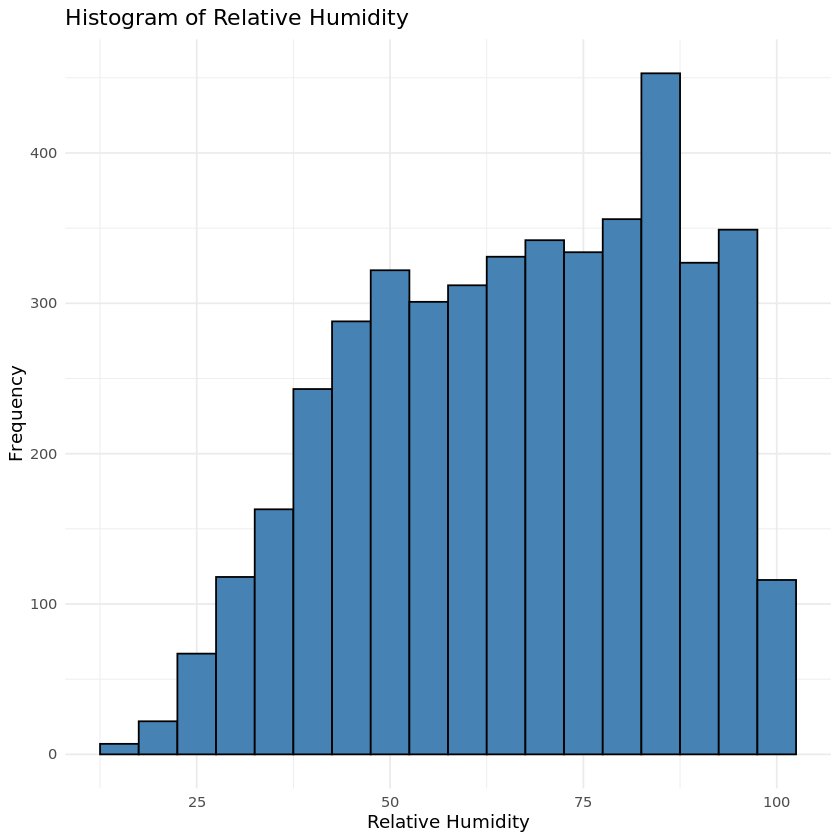

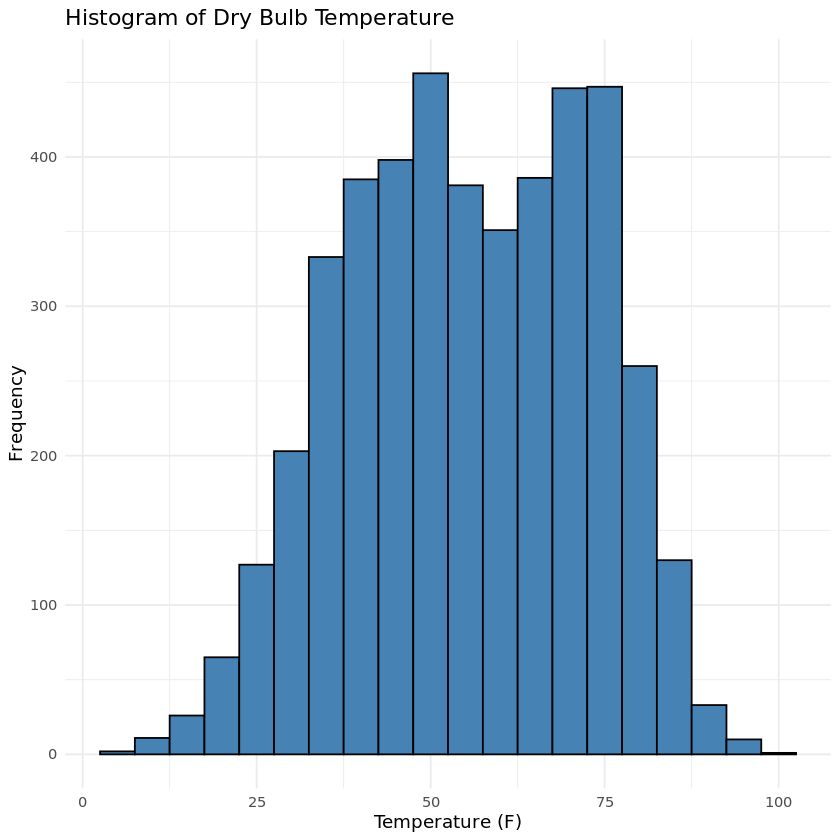

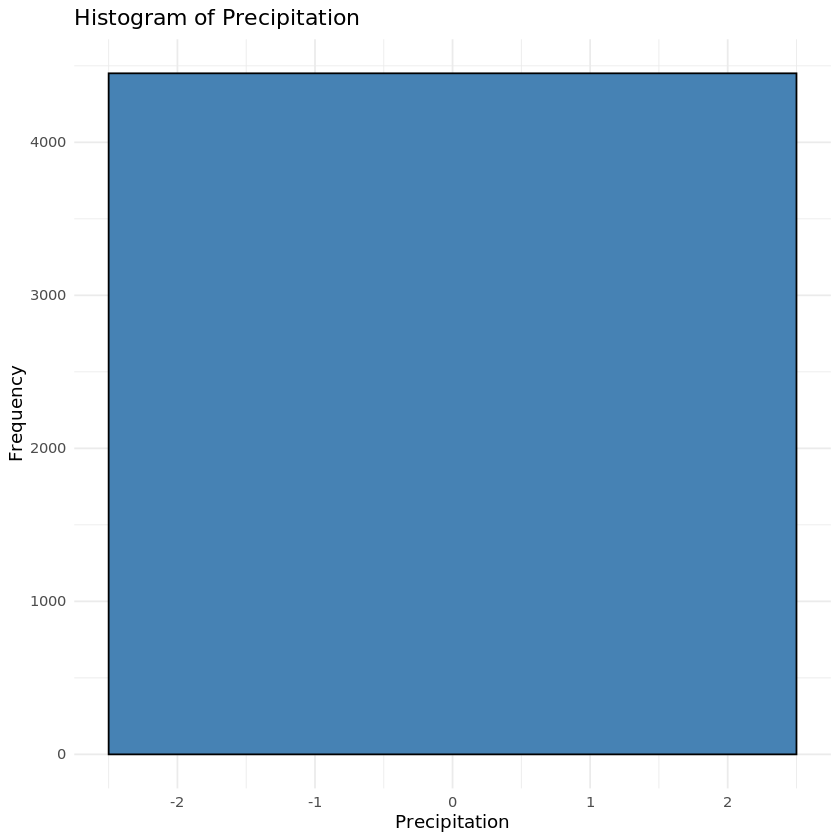

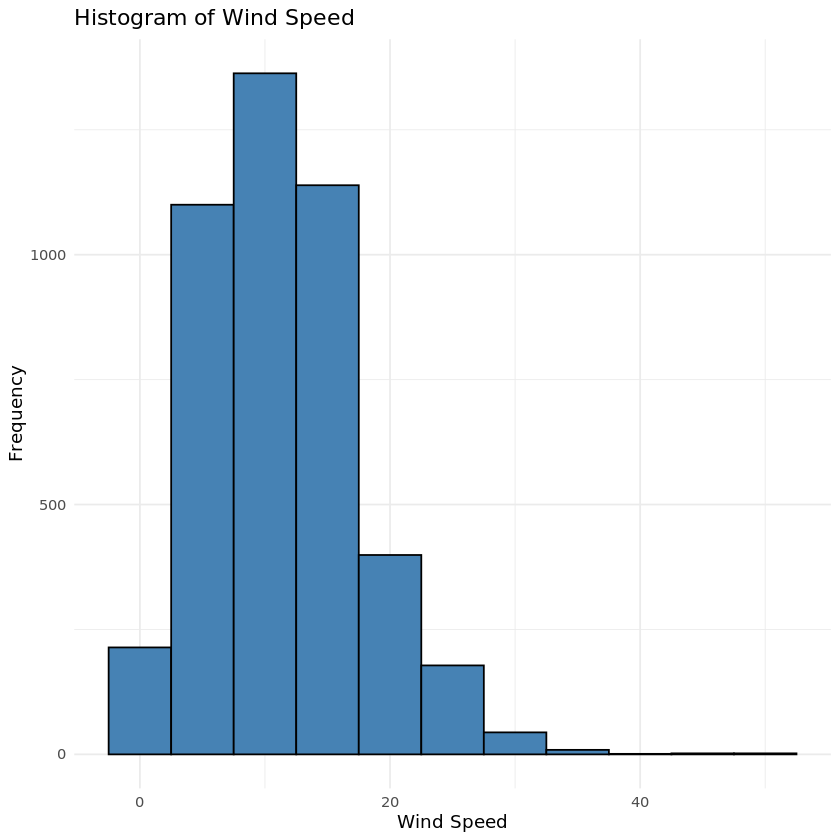

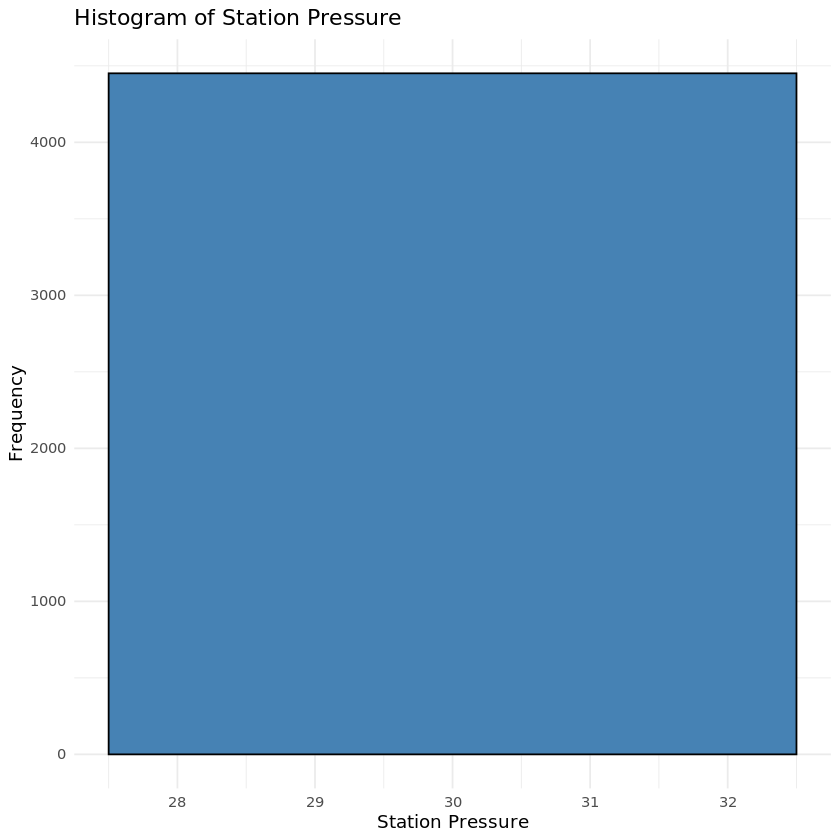

In [101]:
# Histogram for Relative Humidity
ggplot(train_data, aes(x = relative_humidity)) +
  geom_histogram(binwidth = 5, fill = "steelblue", color = "black") +
  labs(title = "Histogram of Relative Humidity", x = "Relative Humidity", y = "Frequency") +
  theme_minimal()

# Histogram for Dry Bulb Temperature (F)
ggplot(train_data, aes(x = dry_bulb_temp_f)) +
  geom_histogram(binwidth = 5, fill = "steelblue", color = "black") +
  labs(title = "Histogram of Dry Bulb Temperature", x = "Temperature (F)", y = "Frequency") +
  theme_minimal()

# Histogram for Precipitation
ggplot(train_data, aes(x = precip)) +
  geom_histogram(binwidth = 5, fill = "steelblue", color = "black") +
  labs(title = "Histogram of Precipitation", x = "Precipitation", y = "Frequency") +
  theme_minimal()

# Histogram for Wind Speed
ggplot(train_data, aes(x = wind_speed)) +
  geom_histogram(binwidth = 5, fill = "steelblue", color = "black") +
  labs(title = "Histogram of Wind Speed", x = "Wind Speed", y = "Frequency") +
  theme_minimal()

# Histogram for Station Pressure
ggplot(train_data, aes(x = station_pressure)) +
  geom_histogram(binwidth = 5, fill = "steelblue", color = "black") +
  labs(title = "Histogram of Station Pressure", x = "Station Pressure", y = "Frequency") +
  theme_minimal()

<a id="cell8"></a>
## 8. Linear Regression 
After exploring the dataset more, you are now ready to start creating models to predict the precipitation (`precip`).

Create simple linear regression models where `precip` is the response variable and each of `relative_humidity`, `dry_bulb_temp_f`,`wind_speed` or `station_pressure` will be a predictor variable, e.g. `precip ~ relative_humidity`, `precip ~ dry_bulb_temp_f`, etc. for a total of four simple models. 
Additionally, visualize each simple model with a scatter plot.


Linear Regression Model Specification (regression)

Computational engine: lm 


parsnip model object

Fit time:  2ms 

Call:
stats::lm(formula = formula, data = data)

Coefficients:
      (Intercept)  relative_humidity  
       -0.0148979          0.0002945  


.pred,truth
<dbl>,<dbl>
-0.0013525055,0.00
0.0113094781,0.00
0.0001198182,0.00
0.0042423245,0.00
0.0116039428,0.06
0.0127818018,0.00


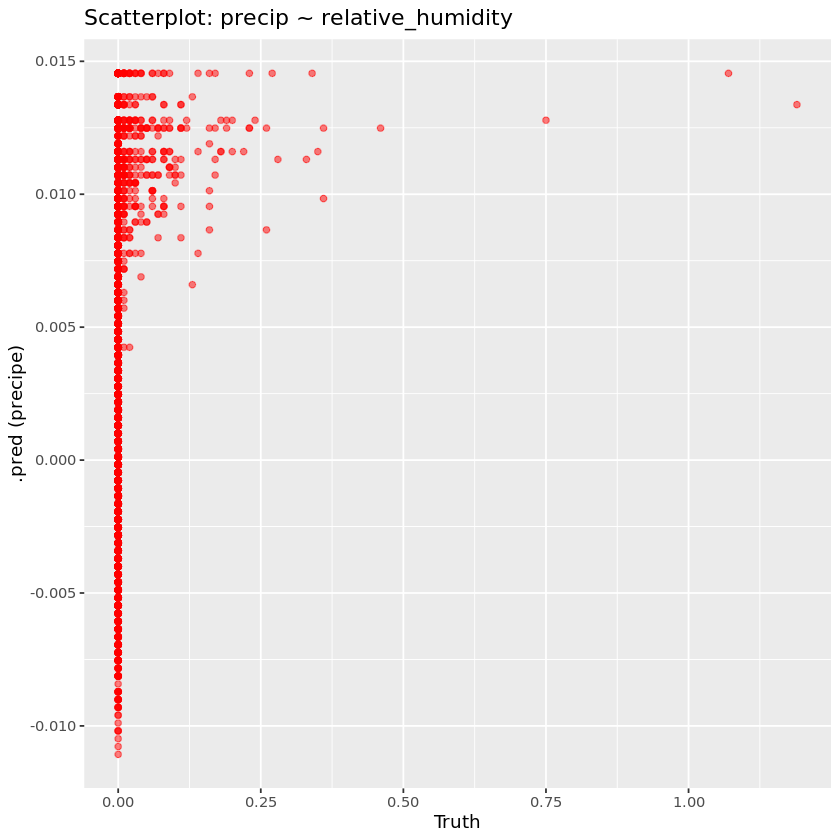

In [81]:
# relative_humidity (train_fit1)
lm_spec1 <- linear_reg() %>%
  set_engine(engine = "lm")
lm_spec1

train_fit1 <- lm_spec1 %>%
    fit(precip ~ relative_humidity, data = train_data)
train_fit1
# predict new data based on training data set
train_result1 <- train_fit1 %>%
    predict(new_data = train_data) %>%
    mutate(truth = train_data$precip)
head(train_result1)

# Scatterplot (train_result1)
ggplot(train_result1, aes(x = truth, y = .pred)) +
  geom_point(aes(y = .pred), color = "red", alpha = 0.5) +  # Vorhergesagte Werte
  labs(
    title = "Scatterplot: precip ~ relative_humidity",
    x = "Truth",
    y = ".pred (precipe)")

Linear Regression Model Specification (regression)

Computational engine: lm 


parsnip model object

Fit time:  3ms 

Call:
stats::lm(formula = formula, data = data)

Coefficients:
    (Intercept)  dry_bulb_temp_f  
      3.503e-03        2.266e-05  


.pred,truth
<dbl>,<dbl>
0.005383850,0.00
0.004318697,0.00
0.003933429,0.00
0.004046743,0.00
0.004726628,0.06
0.005157222,0.00


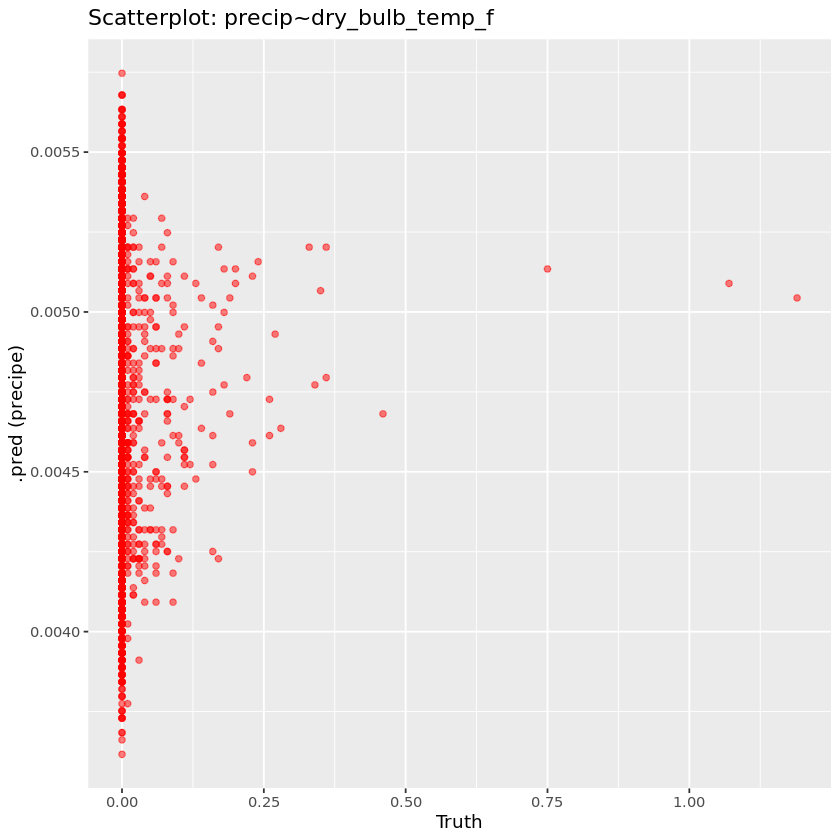

In [82]:
# dry_bulb_temp_f (train_fit2)
lm_spec2 <- linear_reg() %>%
  set_engine(engine = "lm")
lm_spec2

train_fit2 <- lm_spec2 %>%
    fit(precip ~ dry_bulb_temp_f, data = train_data)
train_fit2
# predict new data based on training data set
train_result2 <- train_fit2 %>%
    predict(new_data = train_data) %>%
    mutate(truth = train_data$precip)
head(train_result2)

# Scatterplot (train_result2)
ggplot(train_result2, aes(x = truth, y = .pred)) +
  geom_point(aes(y = .pred), color = "red", alpha = 0.5) +  
  labs(
    title = "Scatterplot: precip~dry_bulb_temp_f",
    x = "Truth",
    y = ".pred (precipe)")

Linear Regression Model Specification (regression)

Computational engine: lm 


parsnip model object

Fit time:  2ms 

Call:
stats::lm(formula = formula, data = data)

Coefficients:
(Intercept)   wind_speed  
  0.0007842    0.0003548  


.pred,truth
<dbl>,<dbl>
0.0053969465,0.00
0.0053969465,0.00
0.0007841966,0.00
0.0046872926,0.00
0.0046872926,0.06
0.0025583312,0.00


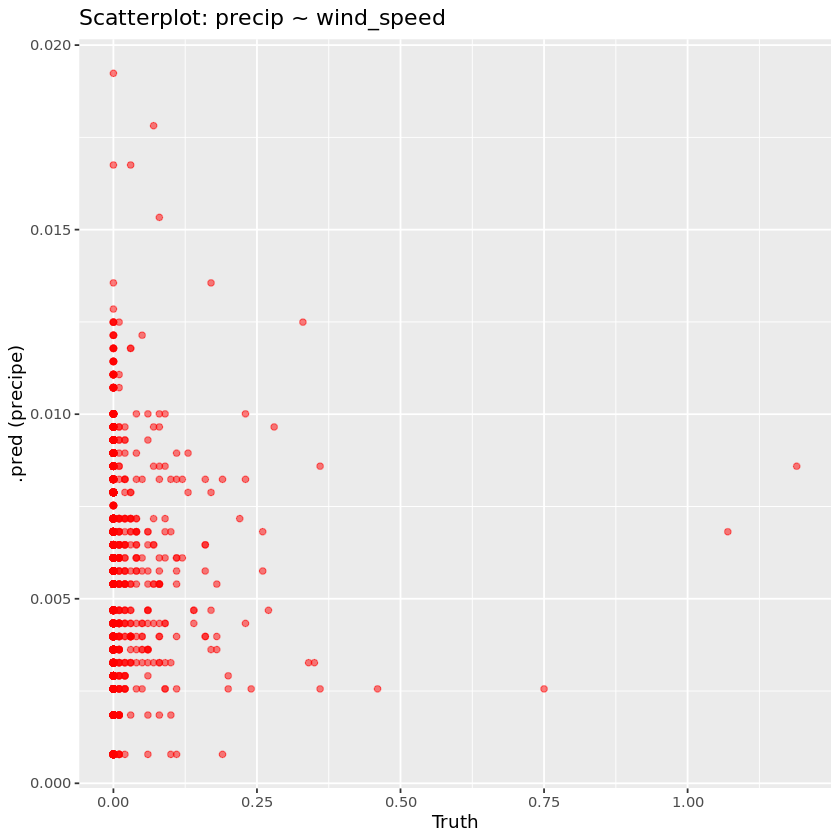

In [83]:
# wind_speed (train_fit3)
lm_spec3 <- linear_reg() %>%
  set_engine(engine = "lm")
lm_spec3

train_fit3 <- lm_spec3 %>%
    fit(precip ~ wind_speed, data = train_data)
train_fit3
# predict new data based on training data set
train_result3 <- train_fit3 %>%
    predict(new_data = train_data) %>%
    mutate(truth = train_data$precip)
head(train_result3)

# Scatterplot (train_result3)
ggplot(train_result3, aes(x = truth, y = .pred)) +
  geom_point(aes(y = .pred), color = "red", alpha = 0.5) +  
  labs(
    title = "Scatterplot: precip ~ wind_speed",
    x = "Truth",
    y = ".pred (precipe)")

Linear Regression Model Specification (regression)

Computational engine: lm 


parsnip model object

Fit time:  2ms 

Call:
stats::lm(formula = formula, data = data)

Coefficients:
     (Intercept)  station_pressure  
          0.5298           -0.0175  


.pred,truth
<dbl>,<dbl>
0.004867762,0.00
0.002592369,0.00
-0.002308479,0.00
-0.001433328,0.00
0.004167641,0.06
0.006268004,0.00


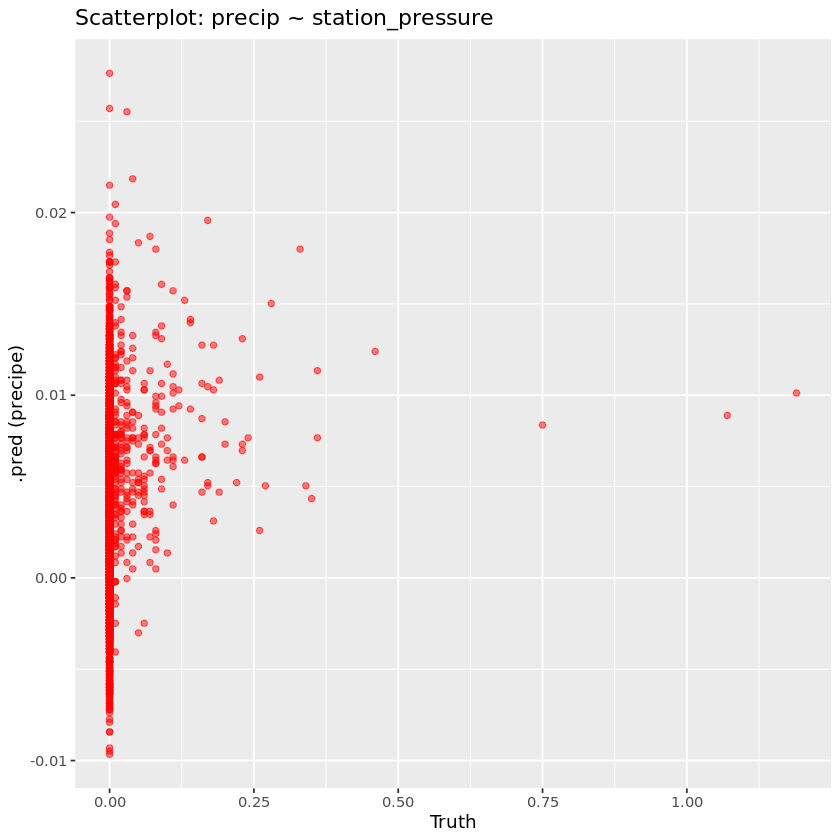

In [84]:
# station_pressure (train_fit4)
lm_spec4 <- linear_reg() %>%
  set_engine(engine = "lm")
lm_spec4

train_fit4 <- lm_spec4 %>%
    fit(precip ~ station_pressure, data = train_data)
train_fit4
# predict new data based on training data set
train_result4 <- train_fit4 %>%
    predict(new_data = train_data) %>%
    mutate(truth = train_data$precip)
head(train_result4)

# Scatterplot (train_result4)
ggplot(train_result4, aes(x = truth, y = .pred)) +
  geom_point(aes(y = .pred), color = "red", alpha = 0.5) +  
  labs(
    title = "Scatterplot: precip ~ station_pressure",
    x = "Truth",
    y = ".pred (precipe)")

<a id="cell9"></a>
## 9. Improve the Model
Now, try improving the simple models you created in the previous section. 

Create at least two more models, each model should use at least one of the different techniques:
1. Add more features/predictors
2. Add regularization (L1, L2 or a mix)
3. Add a polynomial component

Also, for each of the models you create, check the model performance using the **training set** and a metric like MSE, RMSE, or R-squared.

Consider using `tidymodels` if you choose to add regularization and tune lambda.


In [96]:
# ***********************************************************
# 01. Multi Linear Regression - Add more features/predictors
# ***********************************************************
# Setting engine to "lm" for linear regression
lm_spec_MLG <- linear_reg() %>%
  set_engine("lm")
lm_spec_MLG

train_MLG_fit <- lm_spec_MLG %>%
fit(precip ~ relative_humidity + dry_bulb_temp_f + wind_speed,
data = train_data)

train_MLG_results <- train_MLG_fit %>%
# Make the predictions and save the predicted values
predict(new_data = train_data) %>%
# Create a new column to save the true values
mutate(truth = train_data$precip)

test_MLG_results <- train_MLG_fit %>%
# Make the predictions and save the predicted values
predict(new_data = test_data) %>%
# Create a new column to save the true values
mutate(truth = test_data$precip)

rmse_train_MLG <- sqrt(mean((train_MLG_results$truth - train_MLG_results$.pred)^2))
rsq_train_MLG <- rsq(train_MLG_results, truth = truth, estimate = .pred)
rmse_train_MLG
rsq_train_MLG

rmse_test_MLG <- sqrt(mean((test_MLG_results$truth - test_MLG_results$.pred)^2))
rsq_test_MLG <- rsq(test_MLG_results, truth = truth, estimate = .pred)
rmse_test_MLG
rsq_test_MLG


# ************************************************************************
# 02. Elastic Net (L1 and L2) Regularization
# ************************************************************************
# Create Recipe
weather_recipe <- recipe(precip ~ ., data = train_data)

elasticnet_spec <- linear_reg(penalty = 0.5, mixture = 0.2) %>% 
       set_engine("glmnet")

# 2. Erstellen des Workflows
elasticnet_wf <- workflow() %>% 
  add_recipe(weather_recipe)  %>%  # add recipe to the modell
  add_model(elasticnet_spec)    # add recipe to the workflow

# 3. adjust model to the training data
elasticnet_fit <- elasticnet_wf %>% 
  fit(data = train_data)

# 4. extract and print the model data
model_results <- elasticnet_fit %>% 
  pull_workflow_fit() %>% 
  tidy()
  print(model_results)

# Prediction for training data
train_EN_results <- elasticnet_fit %>%
  predict(new_data = train_data) %>%
  bind_cols(train_data) %>%
  mutate(truth = train_data$precip)

# Prediction for testdata data
test_EN_results <- elasticnet_fit %>%
  predict(new_data = test_data) %>%
  bind_cols(test_data) %>%
  mutate(truth = test_data$precip)

# Calculate RMSE und R-squared - training data
rmse_train_EN <- rmse(train_EN_results, truth = truth, estimate = .pred) %>%
  pull(.estimate)

rsq_train_EN <- rsq(train_EN_results, truth = truth, estimate = .pred) %>%
  pull(.estimate)

# Calculate RMSE und R-squared - test data
rmse_test_EN <- rmse(test_EN_results, truth = truth, estimate = .pred) %>%
  pull(.estimate)

rsq_test_EN <- rsq(test_EN_results, truth = truth, estimate = .pred) %>%
  pull(.estimate)

# Ergebnisse anzeigen
cat("Elastic Net - Training RMSE:", rmse_train_EN, "\n")
cat("Elastic Net - Training R-squared:", rsq_train_EN, "\n")
cat("Elastic Net - Testing RMSE:", rmse_test_EN, "\n")
cat("Elastic Net - Testing R-squared:", rsq_test_EN, "\n")

Linear Regression Model Specification (regression)

Computational engine: lm 


[1] 0.03483832

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.03868592


[1] 0.03604406

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.03142108


# A tibble: 261 x 5
   term               step  estimate lambda dev.ratio
   <chr>             <dbl>     <dbl>  <dbl>     <dbl>
 1 (Intercept)           1 0.00476   0.0293   0      
 2 (Intercept)           2 0.00367   0.0267   0.00294
 3 relative_humidity     2 0.0000163 0.0267   0.00294
 4 (Intercept)           3 0.00260   0.0243   0.00565
 5 relative_humidity     3 0.0000323 0.0243   0.00565
 6 (Intercept)           4 0.00157   0.0222   0.00813
 7 relative_humidity     4 0.0000478 0.0222   0.00813
 8 (Intercept)           5 0.000560  0.0202   0.0104 
 9 relative_humidity     5 0.0000629 0.0202   0.0104 
10 (Intercept)           6 0.00964   0.0184   0.0128 
# … with 251 more rows


Warning message:
“A correlation computation is required, but `estimate` is constant and has 0 standard deviation, resulting in a divide by 0 error. `NA` will be returned.”Warning message:
“A correlation computation is required, but `estimate` is constant and has 0 standard deviation, resulting in a divide by 0 error. `NA` will be returned.”

Elastic Net - Training RMSE: 0.0355324 
Elastic Net - Training R-squared: NA 
Elastic Net - Testing RMSE: 0.03661698 
Elastic Net - Testing R-squared: NA 


<a id="cell10"></a>
## 10. Find Best Model
Compare the regression metrics of each model from section 9 to find the best model overall. To do this, 

1. Evaluate the models on the **testing set** using at least one metric (like MSE, RMSE or R-squared).
2. After calculating the metrics on the testing set for each model, print them out in as a table to easily compare. You can use something like:
```
model_names <- c("model_1", "model_2", "model_3")
train_error <- c("model_1_value", "model_2_value", "model_3_value")
test_error <- c("model_1_value", "model_2_value", "model_3_value")
comparison_df <- data.frame(model_names, train_error, test_error)
```
3. Finally, from the comparison table you create, conclude which model performed the best.


In [99]:
# Model Names
model_names <- c("Multi Linear Regression", "Elastic Net")

# Training RMSE
train_rmse <- c(rmse_train_MLG$.estimate, rmse_train_EN$.estimate)

# Training R-squared
train_rsq <- c(rsq_train_MLG$.estimate, rsq_train_EN$.estimate)

# Testing RMSE
test_rmse <- c(rmse_test_MLG$.estimate, rmse_test_EN$.estimate)

# Testing R-squared
test_rsq <- c(rsq_test_MLG$.estimate, rsq_test_EN$.estimate)

# Create a comparison data frame
comparison_df <- data.frame(
  Model = model_names,
  Train_RMSE = train_rmse,
  Train_R_squared = train_rsq,
  Test_RMSE = test_rmse,
  Test_R_squared = test_rsq
)

# Display the comparison table
print(comparison_df)

# Determine the best model
best_model <- comparison_df %>%
  arrange(Test_RMSE, desc(Test_R_squared)) %>%
  slice(1)

cat("Best model:", best_model$Model, "\n")

ERROR: Error in rmse_train_MLG$.estimate: $ operator is invalid for atomic vectors


## Author(s)

<h4> Yiwen Li </h4>

## Contributions

<h4> Tiffany Zhu </h4>

## <h3 align="center"> © IBM Corporation 2021. All rights reserved. <h3/>
